1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

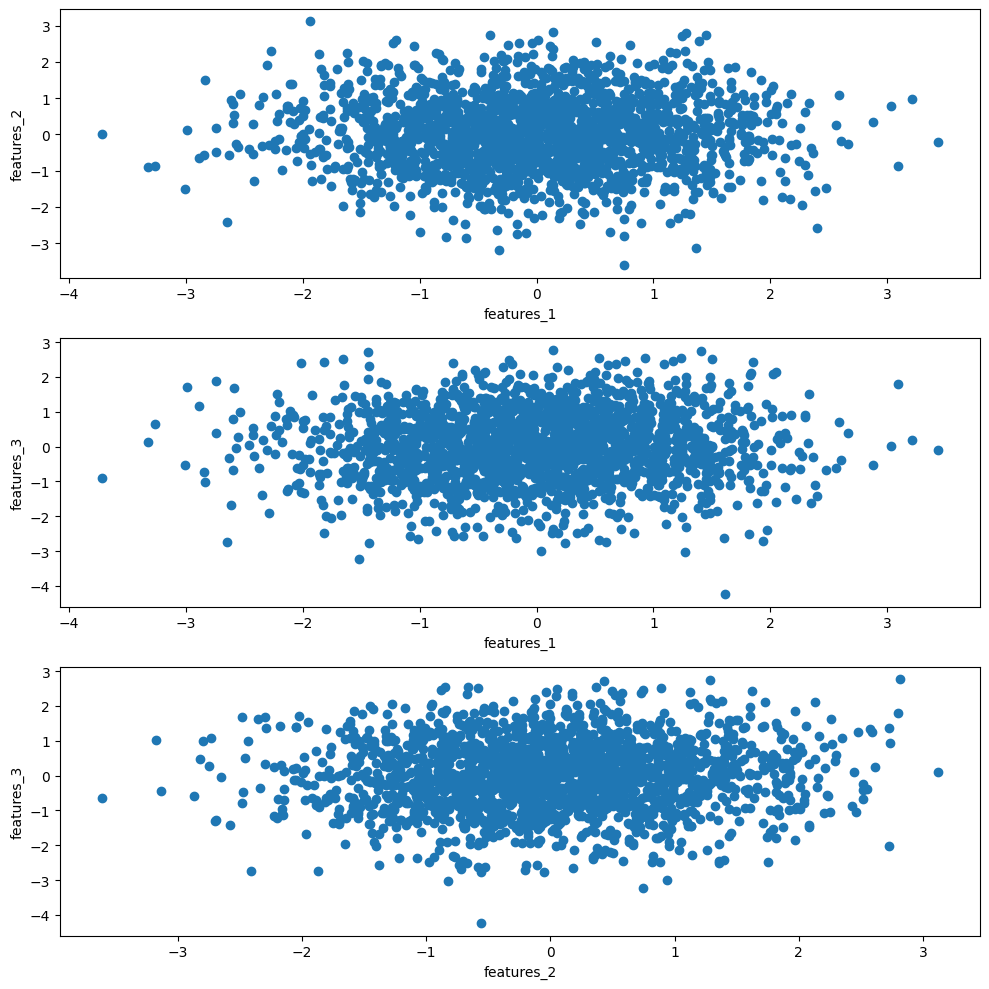

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import pickle
import scipy

FILE = "data/regression_generated.csv"
DATASET = "data/residuals_261.pkl"

def scatterPlots(iFilename, iFeatures):
    dataFrame = pd.read_csv(iFilename)
    combinations = list(itertools.combinations(iFeatures, 2))
    plt.figure(figsize=(10, 10))
    for combo in range(len(combinations)):
        plt.subplot(len(combinations), 1, combo + 1)
        plt.scatter(
            dataFrame[combinations[combo][0]], dataFrame[combinations[combo][1]]
        )
        plt.xlabel(combinations[combo][0])
        plt.ylabel(combinations[combo][1])
        plt.plot()
    plt.tight_layout()
    plt.show()

scatterPlots(FILE,["features_1","features_2","features_3"])


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

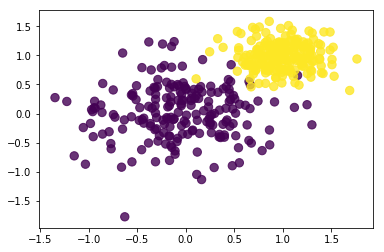

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

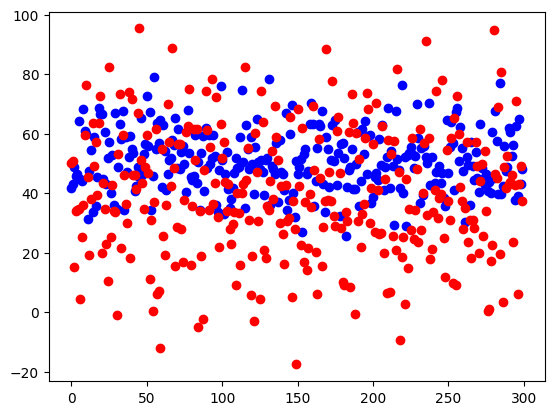

In [5]:
def twoCategoriesScatterPlot(
    mean_1, standarDeviation_1, len_1, mean_2, standarDeviation_2, len_2
):
    dataset_1 = np.random.normal(mean_1, standarDeviation_1, len_1)
    dataset_2 = np.random.normal(mean_2, standarDeviation_2, len_2)

    plt.scatter(np.arange(len_1), dataset_1, label="Dataset 1", color="blue")
    plt.scatter(np.arange(len_2), dataset_2, label="Dataset 2", color="red")
    plt.show()
    
twoCategoriesScatterPlot(50,10,300,40,20,300)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]


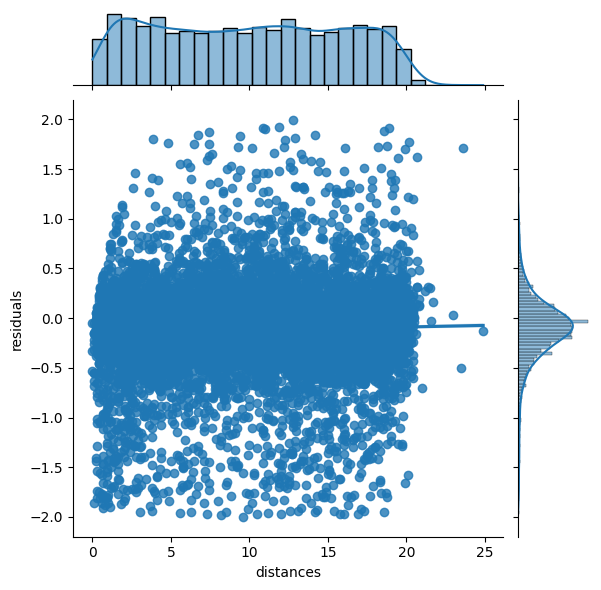

[ 0.          2.76666667  5.53333333  8.3        11.06666667 13.83333333
 16.6        19.36666667 22.13333333 24.9       ]
[6 3 2 ... 1 7 1]


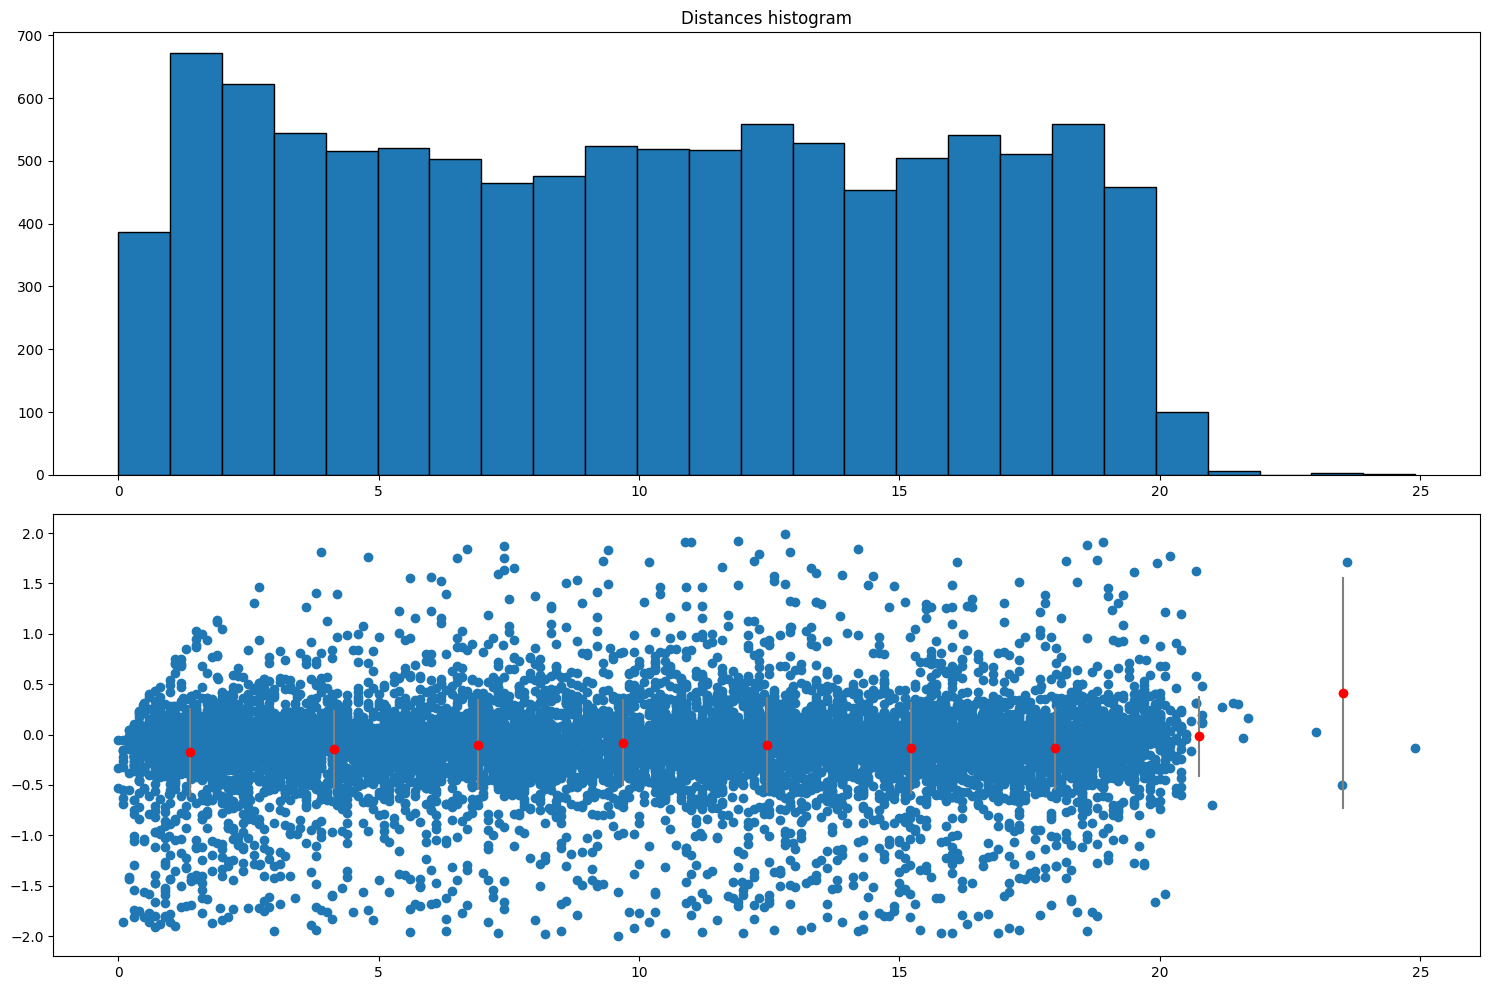

In [6]:
def profilePlot(iFilename):
    with open(iFilename, "rb") as file:
        data = pickle.load(file).item()
    dataFrame = pd.DataFrame(
        {"residuals": data["residuals"], "distances": data["distances"]}
    )
    print(dataFrame)
    cleanDataFrame = dataFrame[abs(dataFrame["residuals"]) < 2]
    sns.jointplot(x="distances", y="residuals", data=cleanDataFrame, kind="reg")
    plt.show()

    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    plt.hist(cleanDataFrame["distances"], bins=25, edgecolor="black")
    plt.title("Distances histogram")

    bins = np.linspace(
        cleanDataFrame["distances"].min(), cleanDataFrame["distances"].max(), 10
    )
    slices = np.digitize(cleanDataFrame["distances"], bins)
    print(bins)
    print(slices)
    x = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
    y = [cleanDataFrame["residuals"][slices == i].mean() for i in range(1, len(bins))]
    err_y = [cleanDataFrame["residuals"][slices == i].std() for i in range(1, len(bins))]
    plt.subplot(2, 1, 2)
    plt.scatter(cleanDataFrame["distances"], cleanDataFrame["residuals"])
    plt.errorbar(x, y, yerr=err_y, fmt="o", color="red", ecolor="grey")
    plt.tight_layout()
    plt.show()

profilePlot(DATASET)


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


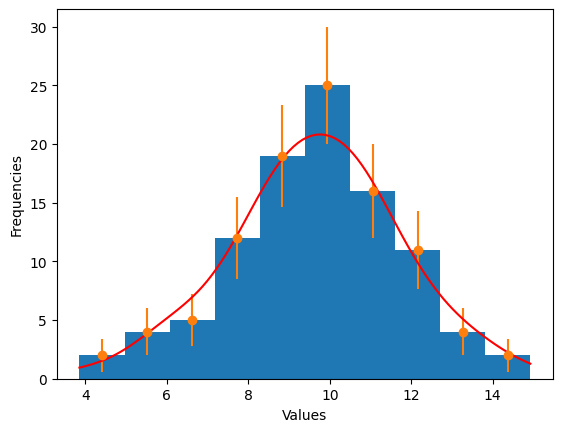

In [7]:
def KDE(len, mean, standarDeviation):
    data = np.random.normal(mean, standarDeviation, len)
    histogram, bins, _ = plt.hist(data, bins=int(np.sqrt(len)))
    binCenters = (bins[1:] + bins[:-1]) / 2
    error = np.sqrt(histogram)

    plt.errorbar(binCenters, histogram, yerr=error, fmt="o")
    plt.xlabel("Values")
    plt.ylabel("Frequencies")    

    defaultValue = 1.06*data.std()*np.power(len,-1/5)
    xRange = np.linspace(data.min(),data.max(),len)
    xGaussianValues = [scipy.stats.norm.pdf(xRange,loc=value,scale=defaultValue) for value in data]
    gaussianSum = np.sum(xGaussianValues,axis=0)

    integral = scipy.integrate.trapz(histogram,x=binCenters)
    integralGaussian = scipy.integrate.trapz(gaussianSum,x=xRange)
    gaussianSumNormalized = gaussianSum*integral/integralGaussian

    plt.plot(xRange,gaussianSumNormalized,color="red")

    plt.show()
    
KDE(100, 10, 2)
